In [1]:
from typing import List, Tuple
from functools import lru_cache

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
import wandb

In [2]:
sns.set_style('whitegrid')
sns.set_palette('deep')

In [3]:
api = wandb.Api()

In [4]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('deep')

In [21]:
def create_dataframe(keys, filters):
  runs = api.runs("gmum/nle", filters=filters)
  data = []
  for run in runs:
    try:
      df = run.history(samples=1000, keys=keys)
      df = pd.DataFrame(df)
      df["seed"] = run.config["seed"]
      data.append(df)
    except Exception as e:
      pass

  return pd.concat(data, axis=0).reset_index()

In [12]:
appo_filter = {
    "$or": [
        {"config.exp_tags": ["monk-APPO"], "config.exp_kind": "eval", "config.name": "eval_array"},
    ]
}
appo_t_filter = {
    "$or": [
        {"config.exp_tags": ["2023_11_05_monk-APPO-T"], "config.exp_kind": "eval", "config.name": "eval_array"},
        {"config.exp_tags": ["2023_11_05_monk-APPO-T"], "config.exp_kind": "eval_stitch"},
    ]
}
appo_kl_t_filter = {
    "$or": [
        {"config.exp_tags": ["2023_11_05_monk-APPO-AA-KL-T"], "config.exp_kind": "eval", "config.name": "eval_array"},
        {"config.exp_tags": ["2023_11_05_monk-APPO-AA-KL-T"], "config.exp_kind": "eval_stitch"},
    ]
}
appo_ks_t_filter = {
    "$or": [
        {"config.exp_tags": ["2023_11_05_monk-APPO-AA-KS-T"], "config.exp_kind": "eval", "config.name": "eval_array"},
        {"config.exp_tags": ["2023_11_05_monk-APPO-AA-KS-T"], "config.exp_kind": "eval_stitch"},
    ]
}

In [7]:
# appo_t_for = create_dataframe(["global/env_train_steps", "eval/mean_forgetting_loss"], appo_t_filter)
# appo_kl_t_for = create_dataframe(["global/env_train_steps", "eval/mean_forgetting_loss"], appo_kl_t_filter)
# appo_ks_t_for = create_dataframe(["global/env_train_steps", "eval/mean_forgetting_loss"], appo_ks_t_filter)

In [8]:
appo_df = create_dataframe(["eval/mean_episode_return", "global/env_train_steps"], appo_filter)

In [22]:
appo_t_df = create_dataframe(["eval/mean_episode_return", "global/env_train_steps"], appo_t_filter)

In [23]:
appo_kl_t_df = create_dataframe(["eval/mean_episode_return", "global/env_train_steps"], appo_kl_t_filter)

In [24]:
appo_ks_t_df = create_dataframe(["eval/mean_episode_return", "global/env_train_steps"], appo_ks_t_filter)

In [ ]:
# appo_t_for["index"] = (np.round(appo_t_for['global/env_train_steps'] / 100_000_000) * 100_000_000).astype(int)
# appo_kl_t_for["index"] = (np.round(appo_kl_t_for['global/env_train_steps'] / 100_000_000) * 100_000_000).astype(int)
# appo_ks_t_for["index"] = (np.round(appo_ks_t_for['global/env_train_steps'] / 100_000_000) * 100_000_000).astype(int)

In [45]:
appo_df = appo_df.replace('NaN', pd.NA).dropna()
appo_t_df = appo_t_df.replace('NaN', pd.NA).dropna()
appo_kl_t_df = appo_kl_t_df.replace('NaN', pd.NA).dropna()
appo_ks_t_df = appo_ks_t_df.replace('NaN', pd.NA).dropna()

In [46]:
appo_df["index"] = (np.round(appo_df['global/env_train_steps'] / 100_000_000) * 100_000_000).astype(int)
appo_t_df["index"] = (np.round(appo_t_df['global/env_train_steps'] / 100_000_000) * 100_000_000).astype(int)
appo_kl_t_df["index"] = (np.round(appo_kl_t_df['global/env_train_steps'] / 100_000_000) * 100_000_000).astype(int)
appo_ks_t_df["index"] = (np.round(appo_ks_t_df['global/env_train_steps'] / 100_000_000) * 100_000_000).astype(int)

In [56]:
appo_t_df[appo_t_df["global/env_train_steps"] == 0]

,index,_step,eval/mean_episode_return,global/env_train_steps,seed
2,0,0.0,1906.787109,0.0,3
23,0,0.0,1943.928711,0.0,0
46,0,0.0,1768.871094,0.0,1
69,0,0.0,2008.850586,0.0,4
77,0,1024.0,1791.912109,0.0,0
91,0,1024.0,1964.72168,0.0,2
112,0,1024.0,1959.250977,0.0,1
130,0,1024.0,1856.904297,0.0,4
134,0,1024.0,2049.201172,0.0,3


In [65]:
appo_kl_t_df = appo_kl_t_df[np.logical_not(np.logical_and(appo_kl_t_df["index"] == 0, appo_kl_t_df["global/env_train_steps"] > 0))]

In [66]:
appo_ks_t_df = appo_ks_t_df[np.logical_not(np.logical_and(appo_ks_t_df["index"] == 0, appo_ks_t_df["global/env_train_steps"] > 0))]

In [68]:
appo_t_df = appo_t_df[np.logical_not(np.logical_and(appo_t_df["index"] == 0, appo_t_df["global/env_train_steps"] > 0))]

In [54]:
for seed in range(5):
    new_row = {'index': 0, 'eval/mean_episode_return': 0, "global/env_train_steps": 0, "seed": seed}
    appo_df = appo_df.append(new_row, ignore_index=True)

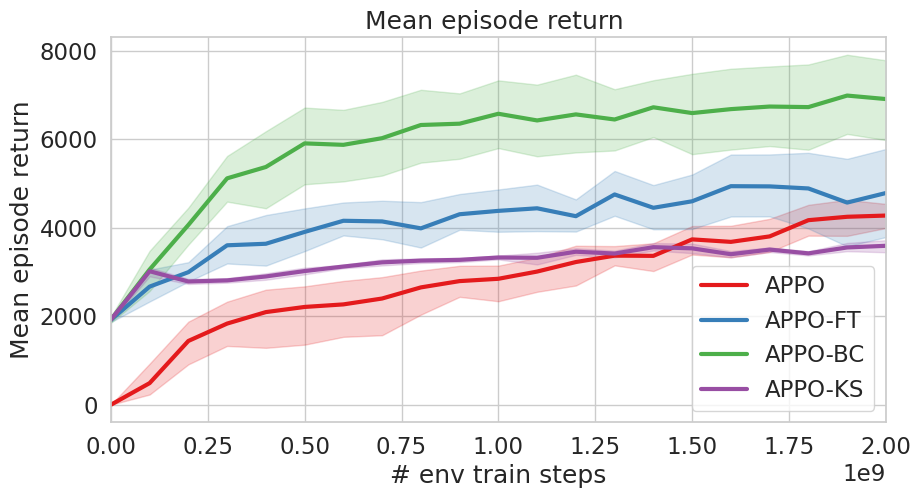

In [69]:
color_palette = sns.color_palette("Set1", 4)

fig, axes = plt.subplots(1, 1, figsize=(10, 5))

sns.lineplot(data=appo_df, x="index", y="eval/mean_episode_return", ax=axes, errorbar=('ci', 90), linewidth=3, legend="full", label="APPO", color=color_palette[0])
sns.lineplot(data=appo_t_df.dropna(axis=0), x="index", y="eval/mean_episode_return", ax=axes, errorbar=('ci', 90), linewidth=3, legend="full", label="APPO-FT", color=color_palette[1])
sns.lineplot(data=appo_kl_t_df, x="index", y="eval/mean_episode_return", ax=axes, errorbar=('ci', 90), linewidth=3, legend="full", label="APPO-BC", color=color_palette[2])
sns.lineplot(data=appo_ks_t_df, x="index", y="eval/mean_episode_return", ax=axes, errorbar=('ci', 90), linewidth=3, legend="full", label="APPO-KS", color=color_palette[3])

# sns.lineplot(data=appo_t_for, x="index", y="eval/mean_forgetting_loss", ax=axes[1], errorbar=('ci', 90), linewidth=3, legend=False, label="APPO-FT", color=color_palette[1])
# sns.lineplot(data=appo_kl_t_for, x="index", y="eval/mean_forgetting_loss", ax=axes[1], errorbar=('ci', 90), linewidth=3, legend=False, label="APPO-BC", color=color_palette[2])
# sns.lineplot(data=appo_ks_t_for, x="index", y="eval/mean_forgetting_loss", ax=axes[1], errorbar=('ci', 90), linewidth=3, legend=False, label="APPO-KS", color=color_palette[3])

axes.set_xlabel("# env train steps")
axes.set_xlim(0, 2_000_000_000)

axes.set_title("Mean episode return ")
axes.set_ylabel("Mean episode return")

# axes[1].set_title("KL div on data generated by teacher")
# axes[1].set_ylabel("Kullback-Leibler Divergence")

plt.show(fig)